# HW1_–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –º–æ–¥–µ–ª–µ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤

**–§–ò–û –°—Ç—É–¥–µ–Ω—Ç–∞: –ö—É–∑–Ω–µ—Ü–æ–≤ –ö–∏—Ä–∏–ª–ª –ò–≥–æ—Ä–µ–≤–∏—á** 

**–î–∞—Ç–∞ –í—ã–ø–æ–ª–Ω–µ–Ω–∏—è: 09.09.2025**

-----
---

## **1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ EDA**

### **1.1. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫**

–ù–∞—á–Ω–µ–º —Å —É—Å—Ç–∞–Ω–æ–≤–∫–∏ –∏ –∏–º–ø–æ—Ä—Ç–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ –¥–ª—è –Ω–∞—à–µ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞.

In [1]:
# # –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫
# !pip install pymorphy3
# !pip install gensim
# !pip install lime

In [2]:
# –û—Å–Ω–æ–≤–Ω—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import os
import re
import json
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from collections import Counter
import pickle
from datetime import datetime

# NLP –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import pymorphy3

# Embeddings
from gensim.models import Word2Vec, FastText
from gensim.models import KeyedVectors
import gensim.downloader as api

# ML
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud

# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å
import shap
import lime

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

# –°–æ–∑–¥–∞–Ω–∏–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –ø–∞–ø–æ–∫
folders = ['data', 'models', 'results', 'visualizations', 'reports']
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ä–µ—Å—É—Ä—Å–æ–≤ NLTK
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
print("NLTK —Ä–µ—Å—É—Ä—Å—ã –∑–∞–≥—Ä—É–∂–µ–Ω—ã")

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ—Ä—Ñ–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞—Ç–æ—Ä–∞ –∏ —Å—Ç–æ–ø-—Å–ª–æ–≤
morph = pymorphy3.MorphAnalyzer()
stop_words_ru = set(stopwords.words('russian'))
stop_words_en = set(stopwords.words('english'))

NLTK —Ä–µ—Å—É—Ä—Å—ã –∑–∞–≥—Ä—É–∂–µ–Ω—ã


In [3]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞–Ω–¥–æ–º —Å–∏–¥
RANDOM_STATE = 42

---
### **1.2. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö**

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞—Ç–∞—Å–µ—Ç –∏ –ø—Ä–æ–≤–µ–¥–µ–º –±–∞–∑–æ–≤—ã–π –∞–Ω–∞–ª–∏–∑, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å –µ–≥–æ —Å—Ç—Ä—É–∫—Ç—É—Ä—É.

address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

   rating                                            rubrics  \
0       3                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1       5  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2       1                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3       4        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4       5  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...  
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...  
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...  
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...  
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...

__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   address  500000 non-null  object
 1   name_ru  499030 non-null  object
 2   rating   500000 non-null  int64 
 3   rubrics  500000 non-null  object
 4   text     500000 non-null  object
dtypes: int64(1), object(4)
memory usage: 19.1+ MB


None

__________________________________________________
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫:address      0
name_ru    970
rating       0
rubrics      0
text         0
dtype: int64
__________________________________________________


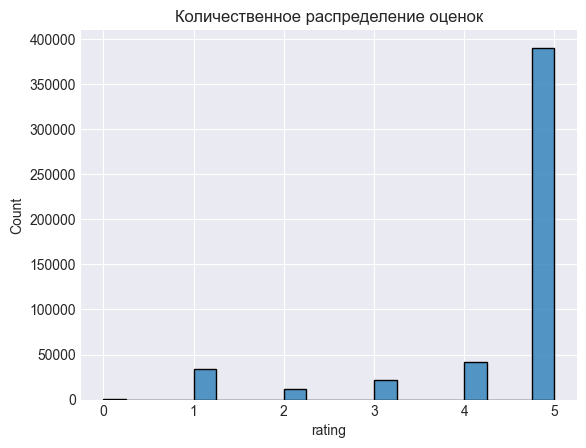

In [4]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞
from datasets import load_dataset
df_raw = load_dataset("d0rj/geo-reviews-dataset-2023")
df_raw = pd.DataFrame(df_raw['train'])

display(df_raw.head())

print("_"*50)
display(df_raw.info())

print("_"*50)
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫:{df_raw.isna().sum()}")

print("_"*50)
sns.histplot(df_raw["rating"])
plt.title("–ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫")
plt.show()


address             name_ru  \
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   
5  –ò—Ä–∫—É—Ç—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ß–µ—Ä–µ–º—Ö–æ–≤–æ, –ü–µ—Ä–≤–æ–º–∞–π—Å–∫–∞—è —É–ª–∏...               Tele2   

   rating                                            rubrics  \
1       5  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2       1                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3       4        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4       5  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   
5       5          –û–ø–µ—Ä–∞—Ç–æ—Ä —Å–æ—Ç–æ–≤–æ–π —Å–≤—è–∑–∏;–ò–Ω—Ç–µ—Ä–Ω–µ—Ç-–ø—Ä–æ–≤–∞–π–¥–µ—Ä   

                                                text  sentiment  
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...          1  
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...          0  
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...          1  
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...          1  
5  –ü—Ä–∏—è—Ç–Ω–æ–µ –æ–±—â–µ–Ω–∏–µ, –≤—Å–µ –¥–æ—Å—Ç—É–ø–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª–∏, –º–Ω–µ ...          1

–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö:

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (478114, 6)

–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö:
address      object
name_ru      object
rating        int64
rubrics      object
text         object
sentiment     int64
dtype: object

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:
address        0
name_ru      936
rating         0
rubrics        0
text           0
sentiment      0
dtype: int64

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:
–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ (1): 431675 (90.3%)
–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ (0): 46439 (9.7%)
__________________________________________________


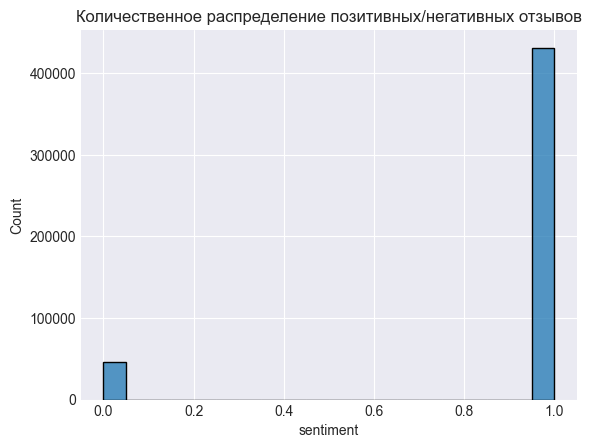

In [5]:
# –ó–ê–î–ê–ù–ò–ï: –£–¥–∞–ª–∏—Ç–µ –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Ä–µ–π—Ç–∏–Ω–≥ 3) –∏ —Å–æ–∑–¥–∞–π—Ç–µ –±–∏–Ω–∞—Ä–Ω—É—é —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é 'sentiment'.
# 1 - –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–π –æ—Ç–∑—ã–≤ (—Ä–µ–π—Ç–∏–Ω–≥ 4, 5)
# 0 - –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–π –æ—Ç–∑—ã–≤ (—Ä–µ–π—Ç–∏–Ω–≥ 1, 2)

# –£–¥–∞–ª–∏—Ç–µ —Å—Ç—Ä–æ–∫–∏ —Å –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ 'sentiment'.

# –°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –º–∞–ø–∏–Ω–≥–∞ —Ä–µ–π—Ç–∏–Ω–≥–∞ –Ω–∞ 3 –≥—Ä—É–ø–ø—ã
# –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø—Ä—è–º–æ–π –º–∞–ø–ø–∏–Ω–≥ –±–µ–∑ –æ–±—Ö–æ–¥–æ–≤, —Ç.–∫. —É –Ω–∞—Å –Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤
# –∏ –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏–Ω—Ç—ã

def sentiment(data):
    # –≥—Ä—É–ø–ø–∞ –∑–∞–≥–ª—É—à–∫–∞ (–¥–ª—è 3 –∏ 0)
    estimation = "-"
    # –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥
    if data in (4, 5):
        estimation = 1
    # –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥
    elif data in (1, 2):
        estimation = 0
    return estimation


# –°–æ–∑–¥–∞–¥–∏–º –∫–æ–ø–∏—é –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞

df = df_raw.copy()

df["sentiment"] = df["rating"].apply(sentiment)

# —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ –≥—Ä—É–ø–ø–µ "-"
df = df.query("sentiment != '-'")

# –ø—Ä–∏–≤–µ–¥–µ–º –∫ —Ç–∏–ø—É —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω–æ–º—É
df['sentiment'] = df['sentiment'].astype(int)

display(df.head())

# –í—ã–≤–æ–¥ –±–∞–∑–æ–≤–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –¥–∞—Ç–∞—Å–µ—Ç–µ
print("–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö:")
print(f"\n–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {df.shape}")
print(f"\n–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö:\n{df.dtypes}")
print(f"\n–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:\n{df.isnull().sum()}")

# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤
class_distribution = df['sentiment'].value_counts()
print("\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:")
print(
    f"–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ (1): {class_distribution.get(1, 0)} ({class_distribution.get(1, 0)/len(df)*100:.1f}%)")
print(
    f"–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ (0): {class_distribution.get(0, 0)} ({class_distribution.get(0, 0)/len(df)*100:.1f}%)")

print("_"*50)
sns.histplot(df["sentiment"])
plt.title("–ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö/–Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤")
plt.show()

> –ù–∞ –ª–∏—Ü–æ —è–≤–Ω—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤, –ø—Ä–æ–∏–∑–≤–µ–¥–µ–º —Å–µ–º–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ –Ω–∞–∏–º–µ–Ω—å—à–µ–º—É –∫–ª–∞—Å—Å—É, –≤ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç –¥–æ–º–∏–Ω–∏—Ä—É–µ—Ç –∫–ª–∞—Å—Å –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –º—ã —Å—ç–º–ø–ª–∏—Ä—É–µ–º —Ä–∞–Ω–¥–æ–º–Ω—É—é –≤—ã–±–æ—Ä–∫—É –ø–æ –Ω–µ–º—É, –ø–æ–ª–Ω–æ—Å—Ç—å—é –∑–∞–±–∏—Ä–∞—è –∫–ª–∞—Å—Å 0.

–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö:

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (92878, 6)

–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö:
address      object
name_ru      object
rating        int64
rubrics      object
text         object
sentiment     int64
dtype: object

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:
address        0
name_ru      166
rating         0
rubrics        0
text           0
sentiment      0
dtype: int64

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:
–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ (1): 46439 (50.0%)
–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ (0): 46439 (50.0%)
__________________________________________________


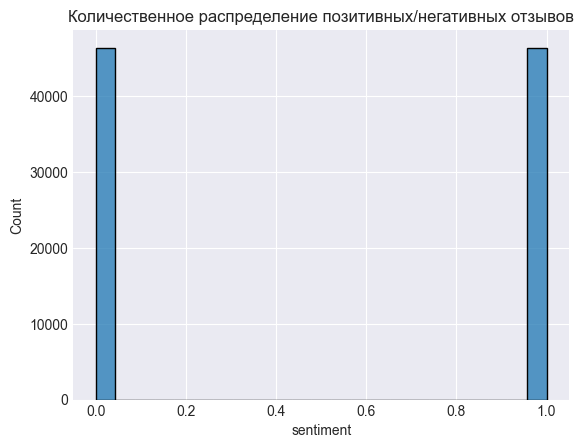

In [6]:
# –ó–ê–î–ê–ù–ò–ï: –°–±–∞–ª–∞–Ω—Å–∏—Ä—É–π—Ç–µ –∫–ª–∞—Å—Å—ã, —á—Ç–æ–±—ã –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –±—ã–ª–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º.
# –ü–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ
n_negative = df[df['sentiment'] == 0].shape[0]
n_positive = df[df['sentiment'] == 1].shape[0]

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä
min_count = min(n_negative, n_positive)

# –ë–µ—Ä—ë–º —Å–ª—É—á–∞–π–Ω—É—é –≤—ã–±–æ—Ä–∫—É –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ (–ø–æ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–º—É –∫–ª–∞—Å—Å—É)
# —Ö–æ—Ç—å –∫–ª–∞—Å—Å 0 —É –Ω–∞—Å –∏ –ø–æ–ø–∞–¥–∞–µ—Ç –≤ –ø–æ–ª–Ω–æ–º —Å–æ—Å—Ç–∞–≤–µ, –Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º –ø–æ–¥—Ö–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ –±—É–¥–µ—Ç
# –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç –¥–∞—Ç–∞—Å–µ—Ç–∞.
df = pd.concat([
    df[df['sentiment'] == 0].sample(n=min_count, random_state=RANDOM_STATE),
    df[df['sentiment'] == 1].sample(n=min_count, random_state=RANDOM_STATE)
    # –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º
]).sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

# –í—ã–≤–æ–¥ –±–∞–∑–æ–≤–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –¥–∞—Ç–∞—Å–µ—Ç–µ
print("–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö:")
print(f"\n–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {df.shape}")
print(f"\n–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö:\n{df.dtypes}")
print(f"\n–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:\n{df.isnull().sum()}")

# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤
class_distribution = df['sentiment'].value_counts()

print("\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:")
print(
    f"–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ (1): {class_distribution.get(1, 0)} ({class_distribution.get(1, 0)/len(df)*100:.1f}%)")
print(
    f"–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ (0): {class_distribution.get(0, 0)} ({class_distribution.get(0, 0)/len(df)*100:.1f}%)")

print("_"*50)
sns.histplot(df["sentiment"])
plt.title("–ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö/–Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤")
plt.show()

> –ö–ª–∞—Å—Å—ã —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã. –ò–º–µ—é—Ç—Å—è –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø–æ–ª–µ name_ru, –Ω–æ –∑–∞–¥–∞–Ω–∏—è –Ω–µ —É–∫–∞–∑—ã–≤–∞–ª–∏ –æ—á–∏—â–∞—Ç—å —ç—Ç—É –∫–æ–ª–æ–Ω–∫—É + –≤ –∞–Ω–∞–ª–∏–∑–µ —Å–µ–º–∞–Ω—Ç–∏–∫–∏ –Ω–∞–∑–≤–∞–Ω–∏–µ –∑–∞–≤–µ–¥–µ–Ω–∏—è –≤ –ª—É—á—à–µ–º —Å–ª—É—á–∞–µ –Ω–µ –±—É–¥–µ—Ç –∏–º–µ—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è, –∞ –≤ —Ö—É–¥—à–µ–º –º–æ–∂–µ—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ —É—Ç–µ—á–∫–µ –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ —á—Ç–æ –ø–æ–∫–∞ –æ—Å—Ç–∞–≤–∏–º.

---
### **1.3. –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö (EDA)**

–ü—Ä–æ–≤–µ–¥–µ–º –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–∏–π –∞–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

In [7]:
# –°–æ–∑–¥–∞–¥–∏–º –∫–æ–ø–∏—é
df_count = df.copy()
display(df_count.head())

address  \
0     –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ü—É—à–∫–∏–Ω, –°–æ—Ñ–∏–π—Å–∫–∏–π –±—É–ª—å–≤–∞—Ä, 32   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –í–æ—Å–∫—Ä–µ—Å–µ–Ω—Å–∫, –º–∏–∫—Ä–æ—Ä–∞–π–æ–Ω –¶–µ...   
2                    –ú–æ—Å–∫–≤–∞, –ö–∞—Å–∏–º–æ–≤—Å–∫–∞—è —É–ª–∏—Ü–∞, –≤–ª26   
3                     –ü–µ—Ä–º—å, —É–ª–∏—Ü–∞ –ì–∞–∑–µ—Ç—ã –ó–≤–µ–∑–¥–∞, 12   
4  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ü–∞–≤–ª–æ–≤—Å–∫–∏–π –ü–æ—Å–∞–¥, –ë–æ–ª—å—à–∞—è ...   

                          name_ru  rating  \
0  Tsar Palace Luxury Hotel & SPA       5   
1                      –¶–µ–Ω—Ç—Ä —Å—É—à–∏       5   
2                      –ê—Å—Ç–∞–ª-–ê–≥—Ä–æ       5   
3                     The Friends       1   
4                    –í–∫—É—Å –í–æ—Å—Ç–æ–∫–∞       1   

                                             rubrics  \
0                                          –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
1  –î–æ—Å—Ç–∞–≤–∫–∞ –µ–¥—ã –∏ –æ–±–µ–¥–æ–≤;–ü–∏—Ü—Ü–µ—Ä–∏—è;–ú–∞–≥–∞–∑–∏–Ω —Å—É—à–∏ –∏ ...   
2          –¢–æ–≤–∞—Ä—ã –¥–ª—è –∂–∏–≤–æ—Ç–Ω—ã—Ö –æ–ø—Ç–æ–º;–¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–æ–º–∞   
3                                      –ö–∞—Ñ–µ;–ë–∞—Ä, –ø–∞–±   
4                                    –ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ   

                                                text  sentiment  
0  –ú–æ–π –õ—é–±–∏–º—ã–π –æ—Ç–µ–ª—å!ü´∂üèº –æ—á–µ–Ω—å —É—é—Ç–Ω–æ.. –ø—Ä–µ–∫—Ä–∞—Å–Ω–∞—è ...          1  
1  –ß–∞—Å—Ç–æ –∑–∞–∫–∞–∑—ã–≤–∞—é –∑–¥–µ—Å—å —Å—É—à–∏ –∏ –ø–∏—Ü—Ü—É –∏ –º–æ–≥—É –ø—Ä–µ–¥...          1  
2  –ö–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –±—Ä–µ–Ω–¥ –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –¥–ª—è –ø–∏—Ç–æ–º—Ü–µ–≤. –®–∏—Ä...          1  
3  –ì–∞—Ä–¥–µ—Ä–æ–± –ø—Ä—è–º –Ω–∞ –≤—Ö–æ–¥–µ, —Å–∞–º —Å–≤–æ—é –≤–µ—Ä—Ö–Ω—é—é –æ–¥–µ–∂–¥...          0  
4  –°–≤–æ–∏–º –Ω–∞–ø–ª–µ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏–µ–º –ª–∏—à–∏–ª–∏—Å—å –ø–æ—Å—Ç...          0

In [8]:
# –ó–ê–î–ê–ù–ò–ï: –î–æ–±–∞–≤—å—Ç–µ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å—Ç–æ–ª–±—Ü—ã —Å –¥–ª–∏–Ω–æ–π —Ç–µ–∫—Å—Ç–∞, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å–ª–æ–≤ –∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π.
df_count['text_length'] = df_count["text"].apply(
    lambda x: len(x))  # –ø–æ–¥—Å—á–∏—Ç–∞–µ–º –¥–ª–∏–Ω–Ω—É —Å—Ç—Ä–æ–∫–∏

# –ø–æ–¥—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –∏—Å–ø–æ–ª—å–∑—É—è –ø–∞–∫–µ—Ç–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ nltk –¥–ª—è —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ —Å–ª–æ–≤.
df_count['word_count'] = df_count['text'].apply(
    lambda x: len(word_tokenize(x, language='russian')))

df_count['sentence_count'] = df_count['text'].apply(
    lambda x: len(sent_tokenize(x, language='russian')))

# –ø–æ–¥—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –ø–æ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—é " ", –≤–∫–ª—á—é–∞—è —Å–ø–µ—Ü-—Ç–æ–∫–µ–Ω—ã, —Å–º–∞–π–ª—ã –∏ —Ç–¥.
# –ø–æ –∏—Ç–æ–≥—É –æ—Å—Ç–∞–Ω–æ–≤–∏–ª—Å—è –Ω–∞ –ø–∞–∫–µ—Ç–Ω–æ–º —Ä–µ—à–µ–Ω–∏–∏ nltk
# df_count['word_count'] = df_count["text"].apply(lambda x: len(x.split()))

# –ù–µ–º–Ω–æ–≥–æ —É—Ä–æ–¥–ª–∏–≤—ã–π –∫–æ–Ω–≤–µ–µ—Ä –ø–æ–¥—Å—á–µ—Ç–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π (–∑–∞ –æ—Å–Ω–æ–≤—É –≤–∑—è–ª —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –º–µ—Ç–æ–¥—ã –ø–∞–Ω–¥–∞—Å –∏ —Ä–µ—É–ª—è—Ä–Ω—ã–µ –≤—ã—Ä–∞–∂–µ–Ω–∏—è)
# –Ω–æ –ø–æ –∏—Ç–æ–≥—É –æ—Ç–∫–∞–∑–∞–ª—Å—è, —Ç.–∫. —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –∏ –ø–æ—Å–ª–µ–¥—É—é—â–∏–π –ø–æ–¥—Å—á–µ—Ç –æ–∫–∞–∑–∞–ª–∏—Å—å —Ç–æ—á–Ω–µ–µ —á–µ—Ä–µ–∑ nltk –æ—Å–æ–±–µ–Ω–Ω–æ –Ω–∞
# –ª–µ–∫—Å–∏—á–µ—Å–∫–∏ –∑–∞—Å–æ—Ä–µ–Ω–Ω—ã—Ö –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è—Ö.
# df_count['sentence_count'] = df_count["text"].str.replace(
#     r'[!?]', '.', regex=True).str.split(".").str.len()

In [9]:
# –í—ã–≤–æ–¥ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ –ø–æ —Ç–µ–∫—Å—Ç–∞–º
print("\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤:")
print(df_count[['text_length', 'word_count', 'sentence_count']].describe())


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤:
        text_length    word_count  sentence_count
count  92878.000000  92878.000000    92878.000000
mean     401.579330     73.031364        5.149992
std      407.980946     76.142993        4.723015
min        2.000000      1.000000        1.000000
25%      166.000000     29.000000        2.000000
50%      275.000000     49.000000        4.000000
75%      496.000000     90.000000        7.000000
max    20162.000000   3606.000000      188.000000


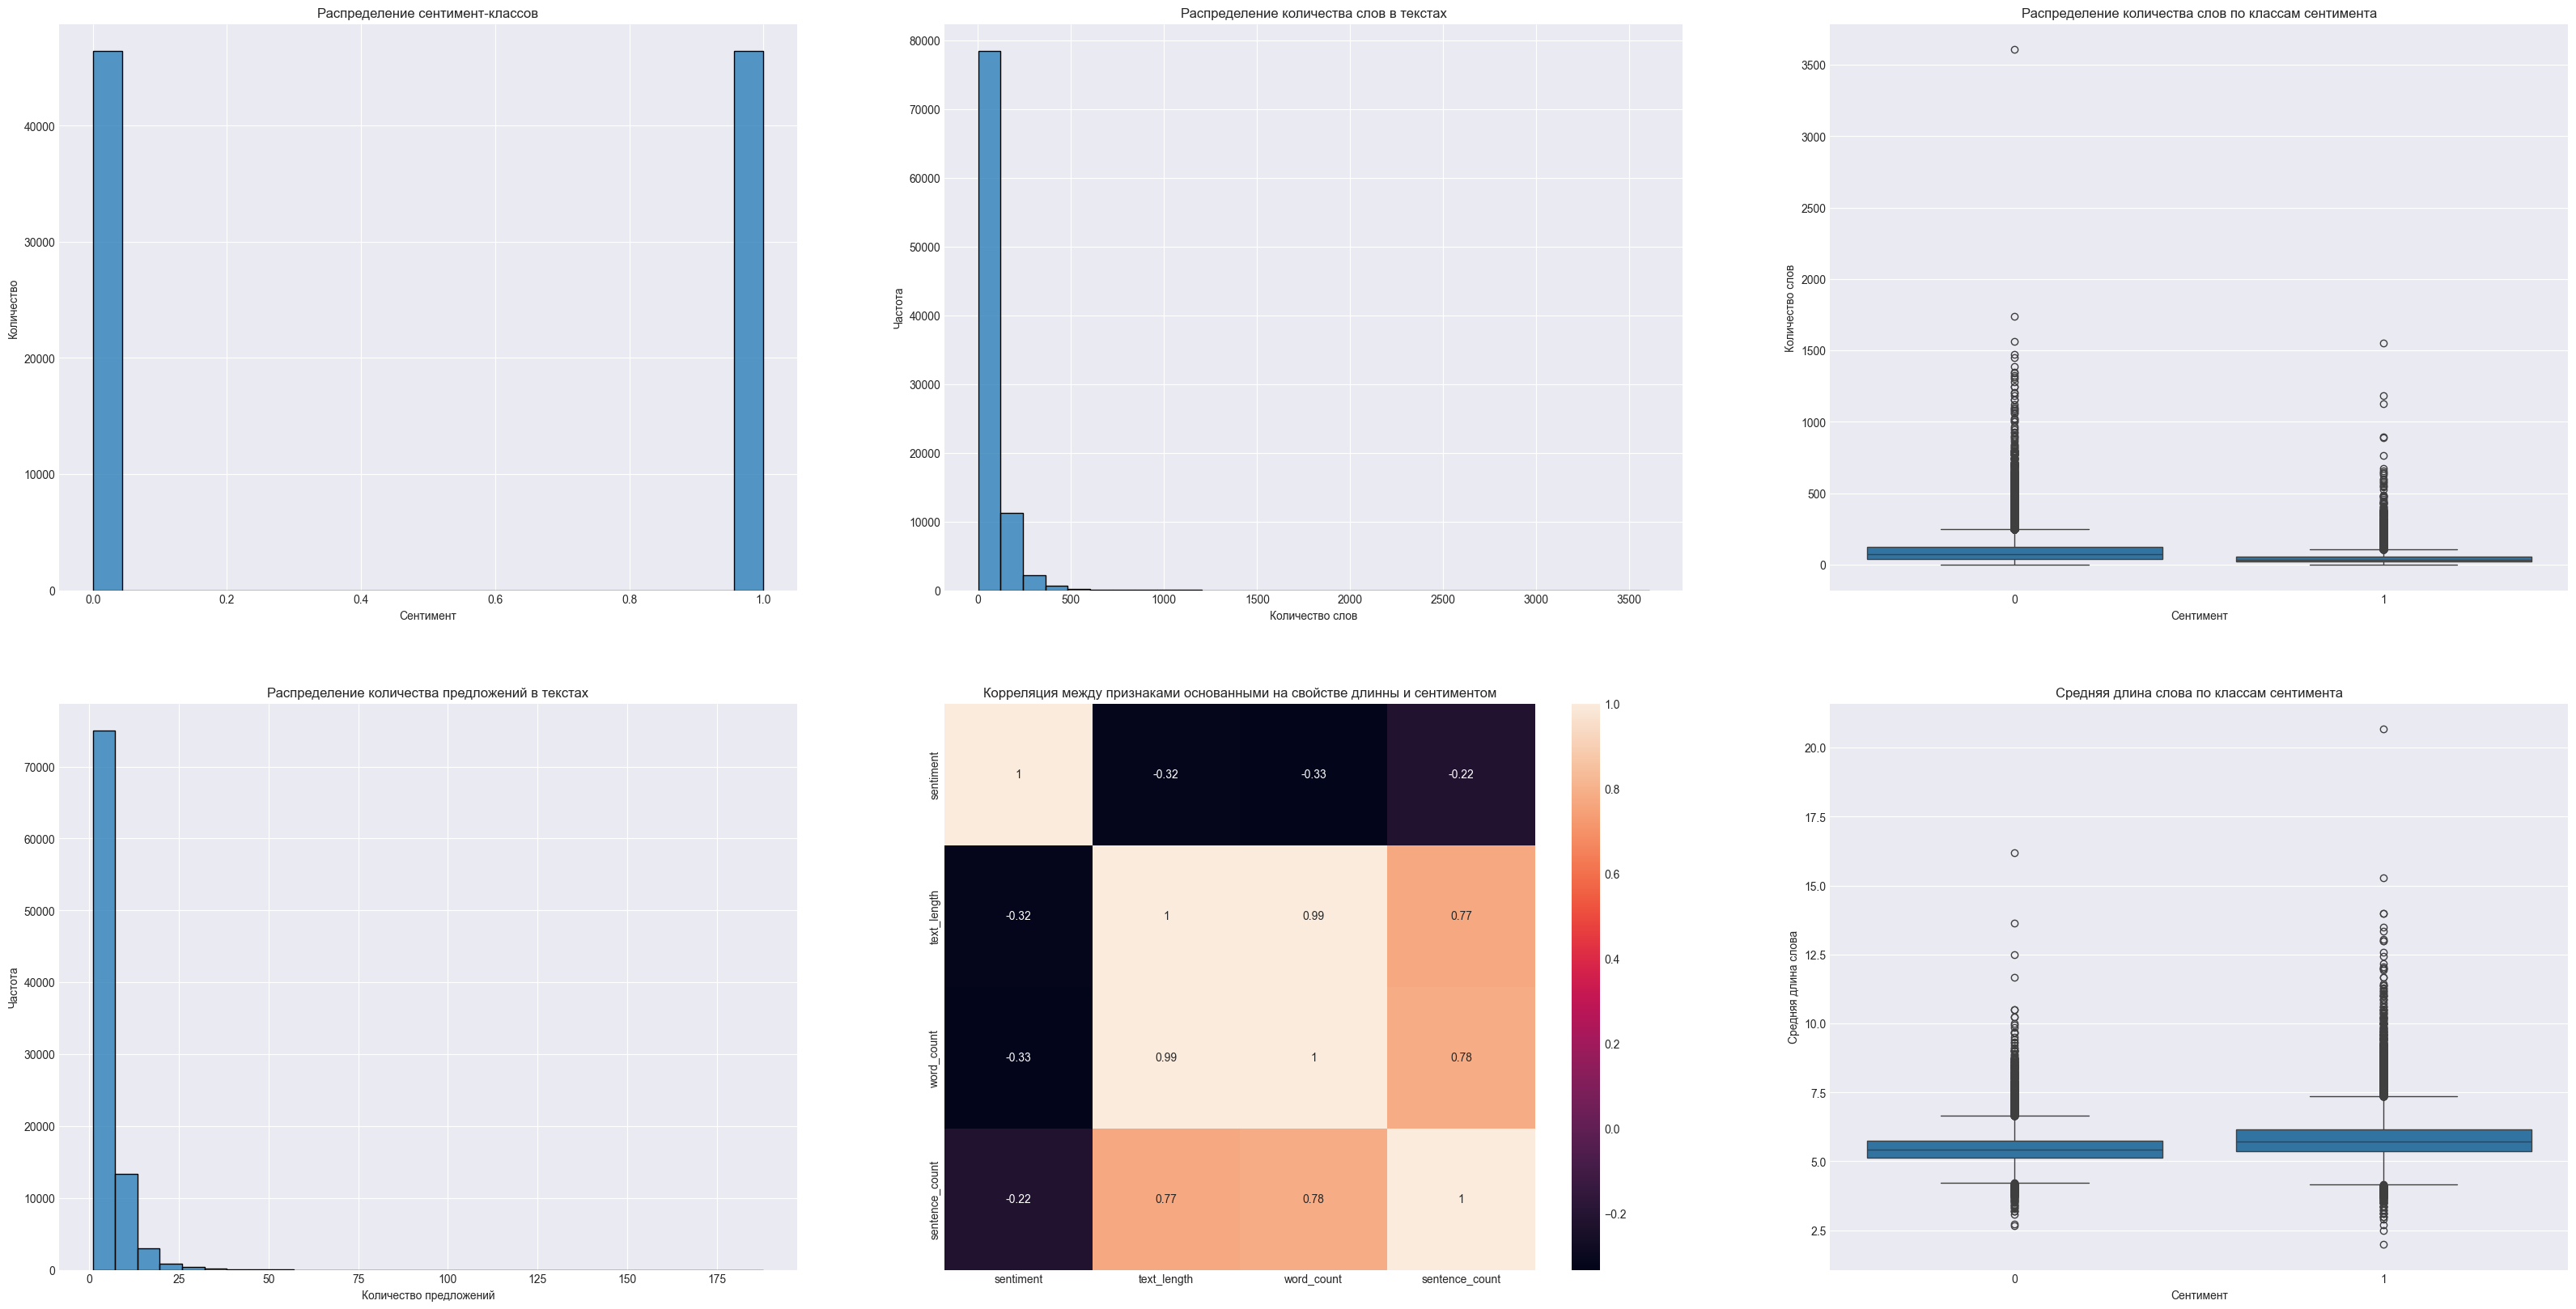

In [10]:
# –ó–ê–î–ê–ù–ò–ï: –°–æ–∑–¥–∞–π—Ç–µ 6 –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ EDA, –Ω–∞–ø—Ä–∏–º–µ—Ä —Ç–∞–∫–∏–µ:
fig, axes = plt.subplots(2, 3, figsize=(40, 20))

# 1. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤
sns.histplot(df_count["sentiment"], ax=axes[0][0])
axes[0][0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç-–∫–ª–∞—Å—Å–æ–≤')
axes[0][0].set_xlabel('–°–µ–Ω—Ç–∏–º–µ–Ω—Ç')
axes[0][0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')

# 2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤
sns.histplot(df_count['word_count'], bins=30, ax=axes[0][1])
axes[0][1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–∞—Ö')
axes[0][1].set_xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤')
axes[0][1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

# 3. Boxplot –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤ –ø–æ –∫–ª–∞—Å—Å–∞–º
sns.boxplot(data=df_count, x='sentiment', y='word_count', ax=axes[0][2])
axes[0][2].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤ –ø–æ –∫–ª–∞—Å—Å–∞–º —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞')
axes[0][2].set_xlabel('–°–µ–Ω—Ç–∏–º–µ–Ω—Ç')
axes[0][2].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤')

# 4. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π
sns.histplot(df_count['sentence_count'], bins=30, ax=axes[1][0])
axes[1][0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –≤ —Ç–µ–∫—Å—Ç–∞—Ö')
axes[1][0].set_xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π')
axes[1][0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

# 5. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –¥–ª–∏–Ω—ã –∏ sentiment
corr_sent = df_count[["sentiment", "text_length",
                      "word_count", "sentence_count"]].corr()
sns.heatmap(corr_sent, ax=axes[1][1], annot=True)
axes[1][1].set_title(
    '–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–º–∏ –Ω–∞ —Å–≤–æ–π—Å—Ç–≤–µ –¥–ª–∏–Ω–Ω—ã –∏ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–æ–º')

# 6. –°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞
df_count['avg_word_length'] = df_count['text_length'] / df_count['word_count']
sns.boxplot(data=df_count, x='sentiment', y='avg_word_length', ax=axes[1][2])
axes[1][2].set_title('–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞ –ø–æ –∫–ª–∞—Å—Å–∞–º —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞')
axes[1][2].set_xlabel('–°–µ–Ω—Ç–∏–º–µ–Ω—Ç')
axes[1][2].set_ylabel('–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞')
plt.show()

-----
---
## **2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞**

–ù–∞ —ç—Ç–æ–º —ç—Ç–∞–ø–µ –º—ã —Å–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø–æ–ª–Ω–æ–π –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.  

- –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –≤—ã–ø–æ–ª–Ω—è—é—â—É—é –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é, —É–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤, –∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è –∏ –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É.  
- –ü—Ä–∏–º–µ–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∫–æ–ª–æ–Ω–∫–∏ —Å –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–º —Ç–µ–∫—Å—Ç–æ–º.   
- –ü—Ä–æ–≤–µ–¥–∏—Ç–µ —á–∞—Å—Ç–æ—Ç–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Å–ª–æ–≤ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤ –¥–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤.  
- –†–∞–∑–¥–µ–ª–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏.  


In [11]:
df_processed = df_count.copy()

In [12]:
def preprocess_text(text,
                    language='russian',
                    use_lemmatization=True,
                    remove_stopwords=True,
                    min_word_length=2):
    """
    –ü–æ–ª–Ω—ã–π pipeline –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞.
    """
    stop_words_ru = set(stopwords.words(language))
    # –ó–ê–î–ê–ù–ò–ï: –†–µ–∞–ª–∏–∑—É–π—Ç–µ —à–∞–≥–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:
    # 1. –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    text = text.lower()

    # 2. –£–¥–∞–ª–µ–Ω–∏–µ HTML –∏ URLs
    text = re.sub(r'<.*?>', ' ', text)  # HTML —Ç–µ–≥–∏
    text = re.sub(r'http\S+', ' ', text)  # URLs

    # 3. –£–¥–∞–ª–µ–Ω–∏–µ —Å–ø–µ—Ü—Å–∏–º–≤–æ–ª–æ–≤
    text = re.sub(r'[^–∞-—è—ëa-z\s]', ' ', text)   # –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –±—É–∫–≤—ã

    # 4. –£–¥–∞–ª–µ–Ω–∏–µ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–±–µ–ª–æ–≤
    text = re.sub(r'\s+', ' ', text)

    # 5. –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è
    tokens = text.split()

    # 6. –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stop_words_ru]

    # 7. –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è
    if use_lemmatization:
        tokens = [morph.parse(token)[0].normal_form for token in tokens]

    # 8. –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ –¥–ª–∏–Ω–µ —Å–ª–æ–≤–∞
    tokens = [token for token in tokens if len(token) > min_word_length]

    return ' '.join(tokens)

In [13]:
# –ó–ê–î–ê–ù–ò–ï: –ü—Ä–∏–º–µ–Ω–∏—Ç–µ –≤–∞—à—É —Ñ—É–Ω–∫—Ü–∏—é –∫ —Å—Ç–æ–ª–±—Ü—É 'text' –∏ —Å–æ–∑–¥–∞–π—Ç–µ –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü 'processed_text'.
df_processed['processed_text'] = df_processed["text"].apply(preprocess_text)

# –ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏
print("\n–≠—Ñ—Ñ–µ–∫—Ç –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:")
print(
    f"–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏: {df_processed['word_count'].mean():.1f} —Å–ª–æ–≤")
print(
    f"–ü–æ—Å–ª–µ –ø–æ–ª–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏: {df_processed['processed_text'].str.split().str.len().mean():.1f} —Å–ª–æ–≤")


–≠—Ñ—Ñ–µ–∫—Ç –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏: 73.0 —Å–ª–æ–≤
–ü–æ—Å–ª–µ –ø–æ–ª–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏: 38.7 —Å–ª–æ–≤



–†–∞–∑–º–µ—Ä —Å–ª–æ–≤–∞—Ä—è –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: 87526 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤
–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:
   –æ—á–µ–Ω—å           : 45697 —Ä–∞–∑
   —ç—Ç–æ             : 36283 —Ä–∞–∑
   —Ö–æ—Ä–æ—à–∏–π         : 20651 —Ä–∞–∑
   –º–µ—Å—Ç–æ           : 20368 —Ä–∞–∑
   –∫–æ—Ç–æ—Ä—ã–π         : 19628 —Ä–∞–∑
   –º–∞–≥–∞–∑–∏–Ω         : 16563 —Ä–∞–∑
   –¥–µ–Ω—å            : 15644 —Ä–∞–∑
   —Å–∫–∞–∑–∞—Ç—å         : 15419 —Ä–∞–∑
   –ø–µ—Ä—Å–æ–Ω–∞–ª        : 15371 —Ä–∞–∑
   –ø—Ä–æ—Å—Ç–æ          : 15081 —Ä–∞–∑
   —Ç–∞–∫–æ–π           : 14583 —Ä–∞–∑
   —Ü–µ–Ω–∞            : 14476 —Ä–∞–∑
   —Ä–µ–±—ë–Ω–æ–∫         : 14264 —Ä–∞–∑
   —Å–≤–æ–π            : 14242 —Ä–∞–∑
   –≤—Ä–µ–º—è           : 13905 —Ä–∞–∑
   —á–µ–ª–æ–≤–µ–∫         : 13219 —Ä–∞–∑
   –≤—Å—ë             : 13017 —Ä–∞–∑
   –≤–µ—Å—å            : 12707 —Ä–∞–∑
   –Ω–æ–º–µ—Ä           : 11463 —Ä–∞–∑
   —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å   : 11379 —Ä–∞–∑


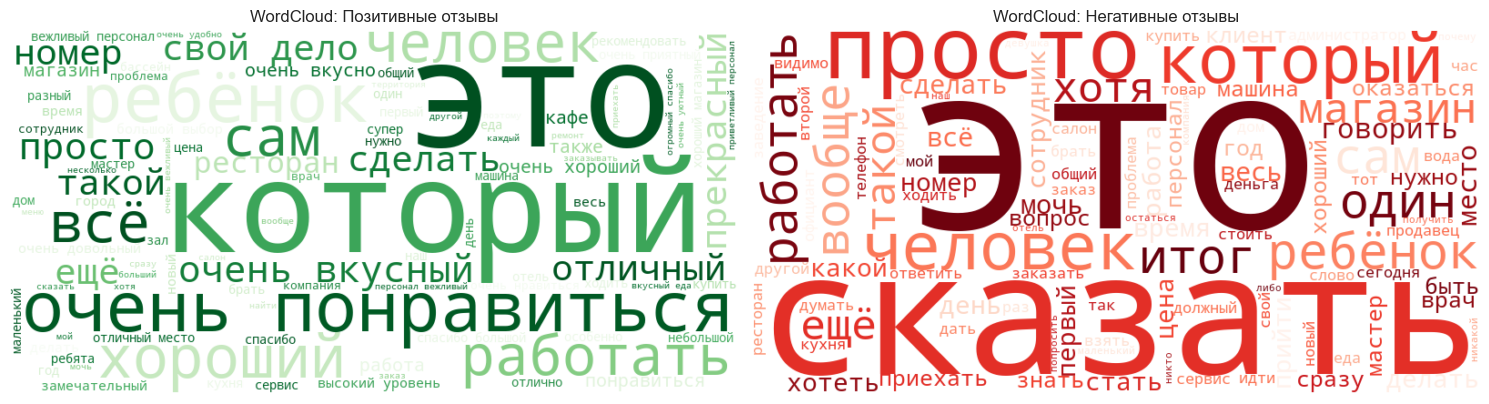

In [14]:
# –ó–ê–î–ê–ù–ò–ï: –ü—Ä–æ–≤–µ–¥–∏—Ç–µ —á–∞—Å—Ç–æ—Ç–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Å–ª–æ–≤ –∏ —Å–æ–∑–¥–∞–π—Ç–µ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤ –¥–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤.
all_words = ' '.join(df_processed['processed_text']).split()
word_freq = Counter(all_words)
vocab_size = len(word_freq)

print(f"\n–†–∞–∑–º–µ—Ä —Å–ª–æ–≤–∞—Ä—è –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: {vocab_size} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤")
print(f"–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:")
for word, freq in word_freq.most_common(20):
    print(f"   {word:15} : {freq:5} —Ä–∞–∑")


# WordCloud –¥–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# –ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ
positive_text = ' '.join(
    df_processed[df_processed['sentiment'] == 1]['processed_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white',
                          colormap='Greens', max_words=100).generate(positive_text)
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('WordCloud: –ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã')
axes[0].axis('off')

# –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ
negative_text = ' '.join(
    df_processed[df_processed['sentiment'] == 0]['processed_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white',
                          colormap='Reds', max_words=100).generate(negative_text)
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].set_title('WordCloud: –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã')
axes[1].axis('off')

plt.tight_layout()
plt.show()

-----
---

## **3. TF-IDF + LogisticRegression**

–í–µ–∫—Ç–æ—Ä–∏–∑—É–µ–º —Ç–µ–∫—Å—Ç —Å –ø–æ–º–æ—â—å—é TF-IDF –∏ –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.

- –ü–æ–¥–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã TfidfVectorizer (–Ω–∞–ø—Ä–∏–º–µ—Ä, max_features, ngram_range), –æ—Ü–µ–Ω–∏–≤–∞—è F1-score –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.  
- –û–±—É—á–∏—Ç–µ LogisticRegression –Ω–∞ –ª—É—á—à–∏—Ö TF-IDF –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö.  
- –û—Ü–µ–Ω–∏—Ç–µ –∏—Ç–æ–≥–æ–≤–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. –í—ã–≤–µ–¥–∏—Ç–µ –æ—Ç—á–µ—Ç —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏ –∏ confusion matrix.  
- –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏).  


In [15]:
df = df_processed.copy()

In [16]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X = df['processed_text']
y = df['sentiment']

# –ù–µ–º–Ω–æ–≥–æ –∏–∑–º–µ–Ω–∏–º —Ä–∞–∑–±–∏–µ–Ω–∏—è, —Ç–∞–∫ –∫–∞–∫ –ø–ª–∞–Ω–∏—Ä—É–µ—Ç—Å—è –ø–æ–∏—Å–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
# —á–µ—Ä–∑ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [33]:
# –ó–ê–î–ê–ù–ò–ï: –ü—Ä–æ–≤–µ–¥–∏—Ç–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ TfidfVectorizer (max_features, ngram_range –∏ —Ç.–¥.).
# –û–±—É—á–∏—Ç–µ LogisticRegression –Ω–∞ –∫–∞–∂–¥–æ–π –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–∏ –∏ –≤—ã–±–µ—Ä–∏—Ç–µ –ª—É—á—à—É—é –ø–æ –º–µ—Ç—Ä–∏–∫–µ F1 –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ø–µ—Ä–µ–±–æ—Ä–∞

# –°–æ–∑–¥–∞–µ–º –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è –ø—Ä–æ—Ü–µ—Å—Å–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False)),
    ('lr', LogisticRegression(random_state=RANDOM_STATE, max_iter=500))
])

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–µ—Ç–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–æ–∏—Å–∫–∞
param_dist = {
    'tfidf__max_features': [500, 1000],
    'tfidf__min_df': [1, 2, 3, 5],
    'tfidf__max_df': [0.7, 0.8, 0.9, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'lr__C':[0.1, 0.01, 0.001],
}

# –í—ã–ø–æ–ª–Ω—è–µ–º —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –ø–æ–∏—Å–∫ (–¥–ª—è —Å–Ω–∏–∂–µ–Ω–∏—è –≤—ã—á–∏—Å–ª–µ—Ç–∏–µ–ª—å–Ω–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏)
# –ø–æ–∏—Å–∫ –ø–æ —Å–µ—Ç–∫–µ –≤—ã–≥–ª—è–¥–∏—Ç –¥–æ—Ä–æ–≥–æ—Å—Ç–æ—è—â–∏–º
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=50, 
    scoring='f1_weighted',
    cv=3,  
    random_state=RANDOM_STATE,
    n_jobs=-1  
)

# –ó–∞–ø—É—Å–∫–∞–µ–º –ø–æ–∏—Å–∫
random_search.fit(X_train, y_train)

# –í—ã–≤–æ–¥–∏–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", random_search.best_params_)
print("–õ—É—á—à–∏–π F1-score (–∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è):", random_search.best_score_)


–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 1, 'tfidf__max_features': 1000, 'tfidf__max_df': 0.7, 'lr__C': 0.1}
–õ—É—á—à–∏–π F1-score (–∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è): 0.9234981347557297


Accuracy –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9248
Precision –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9293
Recall –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9197
F1-Score –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9245
ROC-AUC –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9759

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–∞—Ö:  0.930


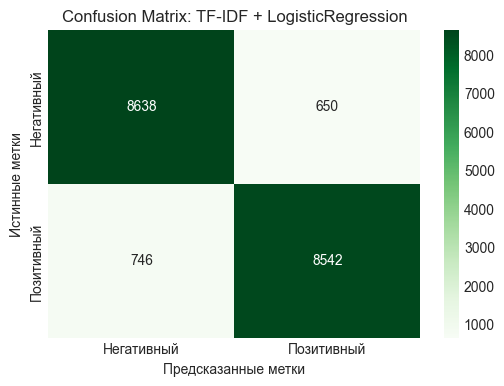

In [ ]:
# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
y_val_pred_tfidf = random_search.predict(X_val)
y_val_pred_proba_tfidf = random_search.predict_proba(X_val)


In [18]:
# –ó–ê–î–ê–ù–ò–ï: –†–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ –∏ –≤—ã–≤–µ–¥–∏—Ç–µ –º–µ—Ç—Ä–∏–∫–∏ (Accuracy, Precision, Recall, F1, ROC_AUC) –∏ confusion matrix.
# –Ω–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é

def metrics_calc(y_val, y_val_pred, y_val_pred_proba, name=None, print_metrics=True):

    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred_proba[:, 1])
    cm_w2v = confusion_matrix(y_val, y_val_pred)

    if print_metrics:
        print(f"Accuracy –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: {accuracy:.4f}")
        print(f"Precision –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: {precision:.4f}")
        print(f"Recall –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: {recall:.4f}")
        print(f"F1-Score –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: {f1:.4f}")
        print(f"ROC-AUC –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: {roc_auc:.4f}\n")

        print(
            f"–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–∞—Ö:  {cm_w2v[0, 0] / (cm_w2v[0, 1] + cm_w2v[0, 0]):.3f}")
    else:
        pass

    result_dict = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
    }

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_w2v, annot=True, fmt='d', cmap='Greens',
                xticklabels=['–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π', '–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–π'],
                yticklabels=['–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π', '–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–π'])
    plt.title(f'Confusion Matrix: {name} + LogisticRegression')
    plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏')
    plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –º–µ—Ç–∫–∏')
    plt.show()

    return result_dict


In [ ]:
# –í—ã–∑–æ–≤–µ–º –µ–µ
result_tfidf = metrics_calc(y_val, y_val_pred_tfidf,
                            y_val_pred_proba_tfidf, name="TF-IDF")

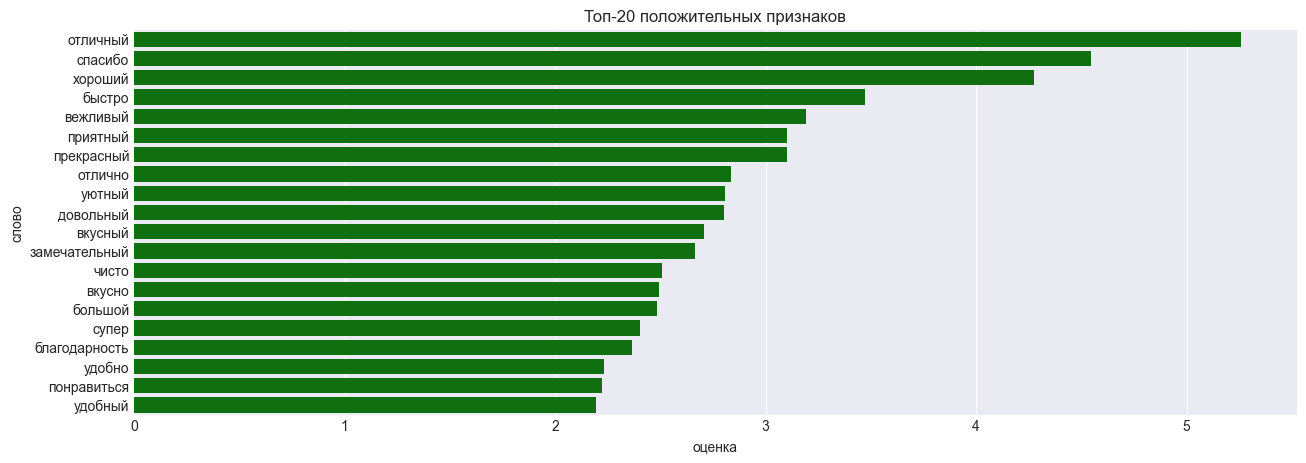

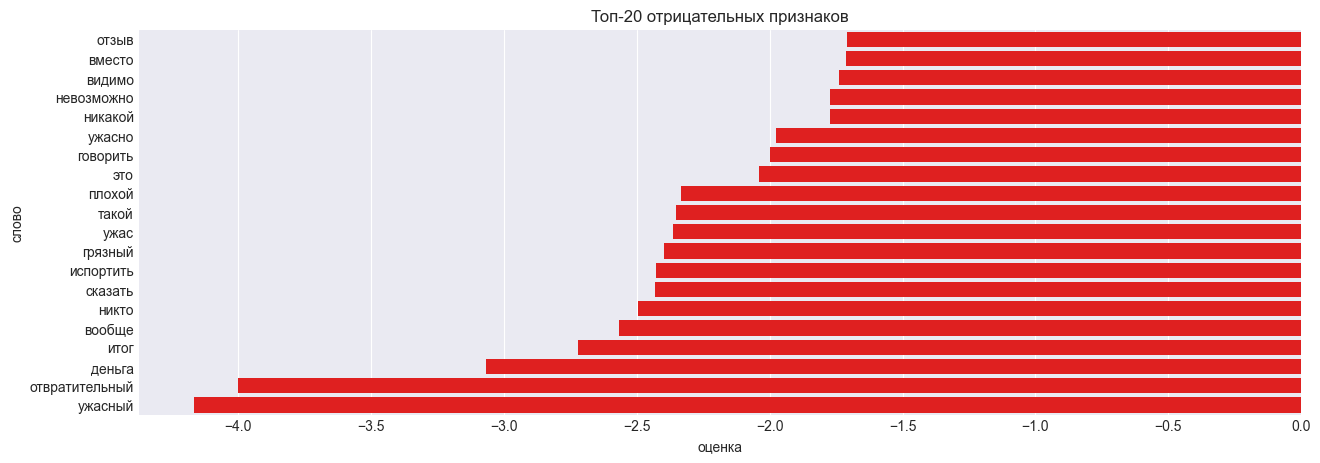

In [72]:
# –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
best_model = random_search.best_estimator_
vectorizer = best_model.named_steps['tfidf']
lr_model = best_model.named_steps['lr']

# –ü–æ–ª—É—á–∞–µ–º –∏–º–µ–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã
feature_names = vectorizer.get_feature_names_out()
coefs = lr_model.coef_[0]

# –°–æ–∑–¥–∞–µ–º DataFrame –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
coef_df = pd.DataFrame({'—Å–ª–æ–≤–æ': feature_names, '–æ—Ü–µ–Ω–∫–∞': coefs})
coef_df = coef_df.sort_values('–æ—Ü–µ–Ω–∫–∞', ascending=False)

top_20 = coef_df.head(20)
worst_20 = coef_df.tail(20)

plt.figure(figsize=(15, 5))
sns.barplot(top_20, x='–æ—Ü–µ–Ω–∫–∞', y='—Å–ª–æ–≤–æ', orient="h", color='green')
plt.title('–¢–æ–ø-20 –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(worst_20, x='–æ—Ü–µ–Ω–∫–∞', y='—Å–ª–æ–≤–æ', orient="h", color='red')
plt.title('–¢–æ–ø-20 –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

In [62]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
with open('models/tfidf_lr.pkl', 'wb') as f:
    pickle.dump(random_search, f)

-----
---

## **4. Word2Vec embeddings**

–¢–µ–ø–µ—Ä—å –∏—Å–ø–æ–ª—å–∑—É–µ–º Word2Vec –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –≤–µ–∫—Ç–æ—Ä–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–π —Ç–µ–∫—Å—Ç–∞.

- –û–±—É—á–∏—Ç–µ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å Word2Vec –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ. –ü–æ–¥–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (vector_size, window, sg), –æ—Ü–µ–Ω–∏–≤–∞—è F1-score –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏.  
- –†–µ–∞–ª–∏–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –ø–æ–ª—É—á–µ–Ω–∏—è –≤–µ–∫—Ç–æ—Ä–∞ –¥–æ–∫—É–º–µ–Ω—Ç–∞ –ø—É—Ç–µ–º —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å–ª–æ–≤.
- –û–±—É—á–∏—Ç–µ LogisticRegression –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–∞—Ö.
- –û—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

In [19]:
# –¢.–∫. —è –∏—Å–ø–æ–ª—å–∑—É—é –ø–∞–π–ø–ª–∞–π, —Ç–æ –ø—Ä–∏–¥–µ–¥—Ç—Å—è —Å–æ–∑–¥–∞—Ç—å —Å–≤–æ–π –∫–ª–∞—Å—Å-—Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä
# –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ —à–∞–≥–∞, –≤ —á–∞—Å—Ç–Ω–æ—Å—Ç–∏ –≤–Ω–µ–¥—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏—é –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç–µ–∫—Å–∞ –≤ –≤–µ–∫—Ç–æ—Ä –ø—É—Ç—ë–º —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å–ª–æ–≤.

# –°–æ–∑–¥–∞–µ–º –∫–∞—Å—Ç–æ–º–Ω—ã–π —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –¥–ª—è Word2Vec
class Word2VecTransformer(BaseEstimator, TransformerMixin):
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –æ—Å–Ω–æ–≤–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª–µ—Ç—è—Ç –≤ W2V
    def __init__(self, vector_size=100, window=5, min_count=2, sg=0, workers=4, seed=RANDOM_STATE):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.sg = sg
        self.workers = workers
        self.seed = seed
        self.model = None
        self.vocab = None
        
    def fit(self, X, y=None):
        self.model = Word2Vec(
            sentences=X,
            vector_size=self.vector_size,
            window=self.window,
            min_count=self.min_count,
            sg=self.sg,
            workers=self.workers,
            seed=self.seed
        )
        return self
        
    def transform(self, X):
        # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞–∂–¥—ã–π —Ç–µ–∫—Å—Ç –≤ –≤–µ–∫—Ç–æ—Ä
        return np.array([self._text_to_vector(text) for text in X])
    
    # –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–π –º–µ—Ç–æ–¥, –≤–µ–∫—Ç–æ—Ä–∏–∑–∏—Ä—É—é—â–∏–π –∏ –≤–æ–∑–≤—Ä–∞—â–∞—é—â–∏–π —Å—Ä–µ–¥–Ω—é—é –¥–ª–∏–Ω–Ω—É (–∏–º–ø–ª–µ–º–µ–Ω—Ç–∞—Ü–∏—è —Å. —Å–µ–º–∏–Ω–∞—Ä–∞)
    def _text_to_vector(self, text):
        word_vectors = [
            self.model.wv[word] for word in text 
            if word in self.model.wv
        ]
        if len(word_vectors) == 0:
            return np.zeros(self.vector_size)
        return np.mean(word_vectors, axis=0)

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
tokenized_texts_train = [text.split() for text in X_train]
tokenized_texts_val = [text.split() for text in X_val]

In [ ]:
# –ü–∞–π–ø–ª–∞–π–Ω —Å –∫–∞—Å—Ç–æ–º–Ω—ã–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–º
pipeline_w2v = Pipeline([
    ('w2v', Word2VecTransformer(workers=4, seed=RANDOM_STATE)),
    ('lr', LogisticRegression(random_state=RANDOM_STATE, max_iter=500))
])


# –°–µ—Ç–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
param_grid = {
    'w2v__vector_size': [50, 100],
    'w2v__window': [2, 3, 5],
    'w2v__min_count': [2, 3, 5],
    'w2v__sg': [0, 1],
    'lr__C': [0.1, 0.01, 0.001]
}

# –ü–æ–∏—Å–∫ –ø–æ —Å–µ—Ç–∫–µ
w2v_search = RandomizedSearchCV(
    pipeline_w2v,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1_weighted',
    cv=3,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# –ó–∞–ø—É—Å–∫ –ø–æ–∏—Å–∫–∞ –Ω–∞ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–∞—Ö
w2v_search.fit(tokenized_texts_train, y_train)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", w2v_search.best_params_)
print("–õ—É—á—à–∏–π F1-score (–∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è):", w2v_search.best_score_)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'w2v__window': 5, 'w2v__vector_size': 100, 'w2v__sg': 1, 'w2v__min_count': 5, 'lr__C': 0.1}
–õ—É—á—à–∏–π F1-score (–∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è): 0.9349487381085558


Accuracy –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9357
Precision –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9434
Recall –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9270
F1-Score –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9351
ROC-AUC –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9785

–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–∞—Ö:  0.944


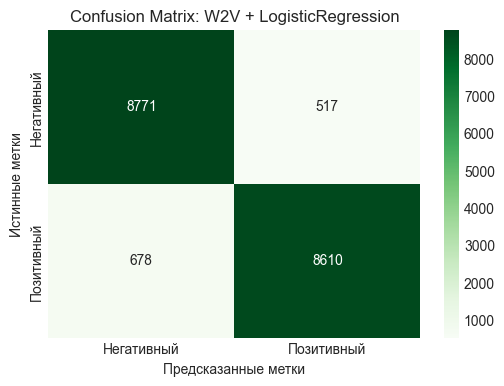

In [75]:
# –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏  –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
y_val_pred_w2v = w2v_search.best_estimator_.predict(tokenized_texts_val)
y_val_pred_proba_w2v = w2v_search.best_estimator_.predict_proba(
    tokenized_texts_val)

# –ó–ê–î–ê–ù–ò–ï: –†–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ –º–µ—Ç—Ä–∏–∫–∏ –∏ –≤—ã–≤–µ–¥–∏—Ç–µ confusion matrix.
# –í—ã–∑–æ–≤–µ–º –µ–µ
result_w2v = metrics_calc(y_val, y_val_pred_w2v,
                            y_val_pred_proba_w2v, name="W2V")

In [ ]:
# –ê–Ω–∞–ª–∏–∑ —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏—Ö –æ—Ç–Ω–æ—à–µ–Ω–∏–π (–Ω–∞–π—Ç–∏ –ø–æ—Ö–æ–∂–∏–µ —Å–ª–æ–≤–∞)
# –ü–æ–ª—É—á–∞–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –∏–∑ –ø–æ–∏—Å–∫–∞
best_model = w2v_search.best_estimator_.named_steps['w2v'].model

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–∏—Å–∫–∞ –ø–æ—Ö–æ–∂–∏—Ö —Å–ª–æ–≤
def find_similar_words(model, word, topn=10):
    """
    –ù–∞—Ö–æ–¥–∏—Ç —Å–ª–æ–≤–∞, –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ –∑–∞–¥–∞–Ω–Ω–æ–µ —Å–ª–æ–≤–æ
    return : –¢—â—Ç—É 
    """
    try:
        similar_words = model.wv.most_similar(word, topn=topn)
        print(f"–°–ª–æ–≤–∞, –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ '{word}':")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
    except KeyError:
        print(f"–°–ª–æ–≤–æ '{word}' –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤ —Å–ª–æ–≤–∞—Ä–µ –º–æ–¥–µ–ª–∏")

# –ê–Ω–∞–ª–∏–∑ —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏—Ö –æ—Ç–Ω–æ—à–µ–Ω–∏–π –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø—Ä–∏–º–µ—Ä–æ–≤
words_to_check = ['–æ—Ç–∑—ã–≤', '—É–∂–∞—Å–Ω–æ', '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ', '—á–∏—Å—Ç–æ', '–∫—É–ª—å—Ç—É—Ä–∞']

In [ ]:
for word in words_to_check:
    find_similar_words(best_model, word)
    print()
    

–°–ª–æ–≤–∞, –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ '–æ—Ç–∑—ã–≤':
  —Ö–≤–∞–ª–µ–±–Ω—ã–π: 0.7685
  n–æ—Ç–∑—ã–≤: 0.7408
  —Ä–µ–π—Ç–∏–Ω–≥: 0.7310
  –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π: 0.7132
  –ø—Ä–æ—á–∏—Ç–∞—Ç—å: 0.6971
  –Ω–∞–∫–∏–ø–µ—Ç—å: 0.6955
  –≤–æ—Å—Ç–æ—Ä–∂–µ–Ω–Ω—ã–π: 0.6954
  –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π: 0.6946
  –ø–æ—á–∏—Ç–∞—Ç—å: 0.6883
  –Ω–∞—á–∏—Ç–∞—Ç—å—Å—è: 0.6815

–°–ª–æ–≤–∞, –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ '—É–∂–∞—Å–Ω–æ':
  –¥–∏–∫–æ: 0.7445
  –∂—É—Ç–∫–æ: 0.7144
  —Ö—Ä–µ–Ω–æ–≤—ã–π: 0.7029
  –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã–π: 0.6888
  –æ—Ç–≤—Ä–∞—Ç–Ω–æ: 0.6816
  —É–∂–∞—Å: 0.6773
  –∫–æ—à–º–∞—Ä–Ω—ã–π: 0.6617
  —É–∂–∞—Å–Ω—ã–π: 0.6614
  –ø–ª–æ—Ö–æ: 0.6593
  –±–µ–∑–æ–±—Ä–∞–∑–Ω–æ: 0.6546

–°–ª–æ–≤–∞, –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ':
  n–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ: 0.7722
  –≤—ã—à: 0.7085
  –æ–±—Å–ª—É–≥–∞: 0.6968
  —Å–µ—Ä–≤–∏—Å: 0.6966
  –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏—Ç–µ–ª—å–Ω—ã–π: 0.6869
  n—Å–µ—Ä–≤–∏—Å: 0.6754
  –æ–±—Å–ª—É–∂–∏–≤–∞—é—â–∏–π: 0.6732
  –ø–µ—Ä—Å–∞–Ω–∞–ª: 0.6691
  —ç–∫—Å—Ç–µ—Ä—å–µ—Ä: 0.6663
  n–æ–±—Å–ª—É–∂–∏–≤–∞—é—â–∏–

In [77]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
with open('models/w2v_lr.pkl', 'wb') as f:
    pickle.dump(w2v_search, f)

-----
---

## **5. FastText embeddings**

–û–±—É—á–∏–º –º–æ–¥–µ–ª—å FastText –∏ —Å—Ä–∞–≤–Ω–∏–º –µ–µ —Å Word2Vec.

- –û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å FastText.
- –ü–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å Word2Vec, –ø–æ–ª—É—á–∏—Ç–µ –≤–µ–∫—Ç–æ—Ä—ã –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –∏ –æ–±—É—á–∏—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä.
- –û—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.
- –ü—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–π—Ç–µ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–æ FastText –Ω–∞ OOV-—Å–ª–æ–≤–∞—Ö (—Å–ª–æ–≤–∞—Ö, –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –≤ —Å–ª–æ–≤–∞—Ä–µ).


In [20]:
# –ó–ê–î–ê–ù–ò–ï: –û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å FastText —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø–æ –≤–∞—à–µ–º—É –≤—ã–±–æ—Ä—É.
class FastTextTransformer(Word2VecTransformer):
    def __init__(self, vector_size=100, window=5, min_count=2, sg=0, workers=4,
                 seed=RANDOM_STATE, min_n=3, max_n=6, word_ngrams=1, hs=0, alpha=0.025):
        # –í—ã–∑—ã–≤–∞–µ–º –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫–ª–∞—Å—Å–∞
        super().__init__(
            vector_size=vector_size,
            window=window,
            min_count=min_count,
            sg=sg,
            workers=workers,
            seed=seed
        )
        # –î–æ–±–∞–≤–ª—è–µ–º —Å–ø–µ—Ü–∏—Ñ–∏—á–Ω—ã–µ –¥–ª—è FastText –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
        self.min_n = min_n
        self.max_n = max_n
        self.word_ngrams = word_ngrams
        self.hs = hs
        self.alpha = alpha

    def fit(self, X, y=None):
        self.model = FastText(
            sentences=X,
            vector_size=self.vector_size,
            window=self.window,
            min_count=self.min_count,
            sg=self.sg,
            workers=self.workers,
            seed=self.seed,
            min_n=self.min_n,
            max_n=self.max_n,
            word_ngrams=self.word_ngrams,
            hs=self.hs,
            alpha=self.alpha
        )
        return self

    def _text_to_vector(self, text):
        word_vectors = []
        for word in text:
            # FastText –º–æ–∂–µ—Ç –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å OOV-—Å–ª–æ–≤–∞, –ø–æ—ç—Ç–æ–º—É –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–µ –Ω—É–∂–Ω–∞
            try:
                word_vectors.append(self.model.wv[word])
            except KeyError:
                # –ï—Å–ª–∏ —Å–ª–æ–≤–æ –Ω–µ –Ω–∞–π–¥–µ–Ω–æ, –ø—Ä–æ–ø—É—Å–∫–∞–µ–º –µ–≥–æ
                continue
                
        if len(word_vectors) == 0:
            return np.zeros(self.vector_size)
        return np.mean(word_vectors, axis=0)

# –ü–∞–π–ø–ª–∞–π–Ω —Å –∫–∞—Å—Ç–æ–º–Ω—ã–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–º
pipeline_ft = Pipeline([
    ('ft', FastTextTransformer(seed=RANDOM_STATE)),
    ('lr', LogisticRegression(random_state=RANDOM_STATE, max_iter=500))
])

In [ ]:
# –†–∞—Å—à–∏—Ä–µ–Ω–Ω–∞—è —Å–µ—Ç–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è FastText
param_grid_ft = {
    'ft__vector_size': [100, 150],
    'ft__window': [3, 5],
    'ft__min_count': [1, 2],
    'ft__sg': [0, 1],  
    'ft__min_n': [2, 3], 
    'ft__max_n': [4, 6],  
    'ft__alpha': [0.025, 0.01],  
    'lr__C': [0.001, 0.0001],
}

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –∏ –æ–±—É—á–µ–Ω–∏–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞
ft_search = RandomizedSearchCV(
    pipeline_ft,
    param_distributions=param_grid_ft,
    n_iter=30,  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π
    scoring='f1_weighted',
    cv=3,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

# –ó–∞–ø—É—Å–∫ –ø–æ–∏—Å–∫–∞
ft_search.fit(tokenized_texts_train, y_train)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", ft_search.best_params_)
print("–õ—É—á—à–∏–π F1-score (–∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è):", ft_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
# –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏  –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
y_val_pred_ft = ft_search.best_estimator_.predict(tokenized_texts_val)
y_val_pred_proba_ft = ft_search.best_estimator_.predict_proba(
    tokenized_texts_val)

# –ó–ê–î–ê–ù–ò–ï: –†–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ –º–µ—Ç—Ä–∏–∫–∏ –∏ –≤—ã–≤–µ–¥–∏—Ç–µ confusion matrix.
# –í—ã–∑–æ–≤–µ–º –µ–µ
result_ft = metrics_calc(y_val, y_val_pred_ft,
                            y_val_pred_proba_ft, name="FastText")

In [ ]:
# –ó–ê–î–ê–ù–ò–ï: –û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å FastText —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø–æ –≤–∞—à–µ–º—É –≤—ã–±–æ—Ä—É.
# fasttext_model = ...

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –∏ –æ–±—É—á–µ–Ω–∏–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞
# ...

# –ó–ê–î–ê–ù–ò–ï: –û—Ü–µ–Ω–∏—Ç–µ –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ (–º–µ—Ç—Ä–∏–∫–∏ –∏ confusion matrix).
# ...

# –¢–µ—Å—Ç –Ω–∞ OOV (out-of-vocabulary) —Å–ª–æ–≤–∞—Ö –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å Word2Vec
# ...

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
# ...

-----
___

## **6. –û—Ç—á–µ—Ç—ã –∏ –≤—ã–≤–æ–¥—ã**
### **6.1. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∏ –∞–Ω–∞–ª–∏–∑**

–°—Ä–∞–≤–Ω–∏–º –≤—Å–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

- –ü–æ–¥–≥–æ—Ç–æ–≤—å—Ç–µ —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É –∏/–∏–ª–∏ –≥—Ä–∞—Ñ–∏–∫ —Å–æ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ –º–µ—Ç—Ä–∏–∫–∞–º–∏ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π.
- –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —Å –ø–æ–º–æ—â—å—é t-SNE.
- –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –æ—à–∏–±–∫–∏ –º–æ–¥–µ–ª–µ–π.


In [ ]:
# –ó–ê–î–ê–ù–ò–ï: –°–æ–∑–¥–∞–π—Ç–µ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –¥–ª—è –º–µ—Ç—Ä–∏–∫ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π.
# –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –æ–±—â—É—é ROC-–∫—Ä–∏–≤—É—é.
# ...

# t-SNE –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
# (–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ Word2Vec –∏–ª–∏ FastText)
# ...

# –ê–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫
# (–ù–∞–π–¥–∏—Ç–µ –ø—Ä–∏–º–µ—Ä—ã —Ç–µ–∫—Å—Ç–æ–≤, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –≤—Å–µ –º–æ–¥–µ–ª–∏ –æ—à–∏–±–∞—é—Ç—Å—è)
# ...

-----

### **6.2. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –æ—Ç—á–µ—Ç–æ–≤**

–ü–æ–¥–≥–æ—Ç–æ–≤—å—Ç–µ –∏—Ç–æ–≥–æ–≤—ã–π –æ—Ç—á–µ—Ç –≤ —Ñ–æ—Ä–º–∞—Ç–µ Markdown.

- –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –æ—à–∏–±–∫–∏ –º–æ–¥–µ–ª–µ–π.
- –°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–π—Ç–µ –∏—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã (5-8 –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π): –∫–∞–∫–æ–π –º–µ—Ç–æ–¥ –ø–æ–∫–∞–∑–∞–ª —Å–µ–±—è –ª—É—á—à–µ –∏ –ø–æ—á–µ–º—É, –≤ —á–µ–º –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ –∫–∞–∂–¥–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞, –∫–∞–∫–∏–µ –¥–∞–ª—å–Ω–µ–π—à–∏–µ —à–∞–≥–∏ –ø–æ —É–ª—É—á—à–µ–Ω–∏—é –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ø—Ä–∏–Ω—è—Ç—å.

In [1]:
# –ó–ê–î–ê–ù–ò–ï: –°–≥–µ–Ω–µ—Ä–∏—Ä—É–π—Ç–µ –æ—Ç—á–µ—Ç, –≤–∫–ª—é—á–∞—é—â–∏–π –æ–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö, —à–∞–≥–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏,
# —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–µ–π, —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑, –≤—ã–≤–æ–¥—ã –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏.
report = f"""
# –û–¢–ß–ï–¢ –ü–û –î–û–ú–ê–®–ù–ï–ú–£ –ó–ê–î–ê–ù–ò–Æ

## 1. –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
...

## 2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞
...

... (–∏ —Ç–∞–∫ –¥–∞–ª–µ–µ)
"""

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –æ—Ç—á–µ—Ç–∞ –≤ —Ñ–æ—Ä–º–∞—Ç–µ markdown, –≤—ã –º–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–∞–∫–∂–µ pdf –∏ docx
with open('reports/final_report.md', 'w', encoding='utf-8') as f:
    f.write(report)
print("–û—Ç—á–µ—Ç —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤ reports/final_report.md")

–û—Ç—á–µ—Ç —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤ reports/final_report.md


-----

## **–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –∑–∞–¥–∞–Ω–∏–µ –ø–æ –∂–µ–ª–∞–Ω–∏—é**

–ó–∞ –∑–∞–¥–∞–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –±–∞–ª–ª—ã –Ω–µ —Å—Ç–∞–≤—è—Ç—Å—è. –û–Ω–æ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –ø–æ –∂–µ–ª–∞–Ω–∏—é —Å—Ç—É–¥–µ–Ω—Ç–∞.

In [ ]:
# –ü—Ä–∏–º–µ—Ä—ã –±–æ–Ω—É—Å–Ω—ã—Ö –∑–∞–¥–∞–Ω–∏–π:
# 1. –ê–Ω—Å–∞–º–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π (—É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π).
# 2. –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è –¥–ª—è –±–æ–ª–µ–µ –Ω–∞–¥–µ–∂–Ω–æ–π –æ—Ü–µ–Ω–∫–∏.
# 3. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∏–∑ gensim-data).
# 4. –ê–Ω–∞–ª–∏–∑ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç–∏ —Å LIME.
# 5. –ó–∞–≥—Ä—É–∑–∫—É Word2Vec –º–æ–¥–µ–ª–∏ –∏–∑ –°–µ–º–∏–Ω–∞—Ä–∞ 1